In [1]:
# execute this cell before you start
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2024-03-18 20:19:35.375262: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1



## To open virtual environment

source tfvenv/bin/activate

#  Assignment

to submit the assignment, please do the following:

- make sure that the notebook runs through and produces all desired output after `Kernel -> Restart & Run all`
- running through the whole notebook must not take no more than 60 minutes on a standard computer, similar to our lab-computers, without GPU and 8GB of RAM



# Q1 The CIFAR-10 dataset.

(10 marks)

Consider the data in  [`keras.datasets.cifar10`](https://www.tensorflow.org/datasets/catalog/cifar10) and train a network which reliably categorizes the data. 
Try to understand tradeoffs:

- What increases computing time?
- What increases accuracy?

This dataset has its own [Wikipedia page](https://en.wikipedia.org/wiki/CIFAR-10), and is often used as benchmark for new proposed methods. 
You can take the cat/dog example from the lecture as a starting point, but you can also find plenty of inspiration in the Internet.  As before, it is not forbidden to get such inspiration, but please stay in the framework of what is covered in the lecture and clearly cite from where you take what. 


To get you started, here some code to show with which you can browse the data:

In [2]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(train_data,train_labels),(test_data,test_labels) = keras.datasets.cifar10.load_data()


from ipywidgets import interact

@interact(k=(0, len(train_data)-1))
def myplot(k):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_title(labels[train_labels[k][0]])
    ax.imshow(train_data[k])


interactive(children=(IntSlider(value=24999, description='k', max=49999), Output()), _dom_classes=('widget-int…

## 1. Visualize the data
print shape of training/test data and labels

In [3]:
print("Training images shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
max(train_labels)

array([9], dtype=uint8)

Plot to see the first few training images

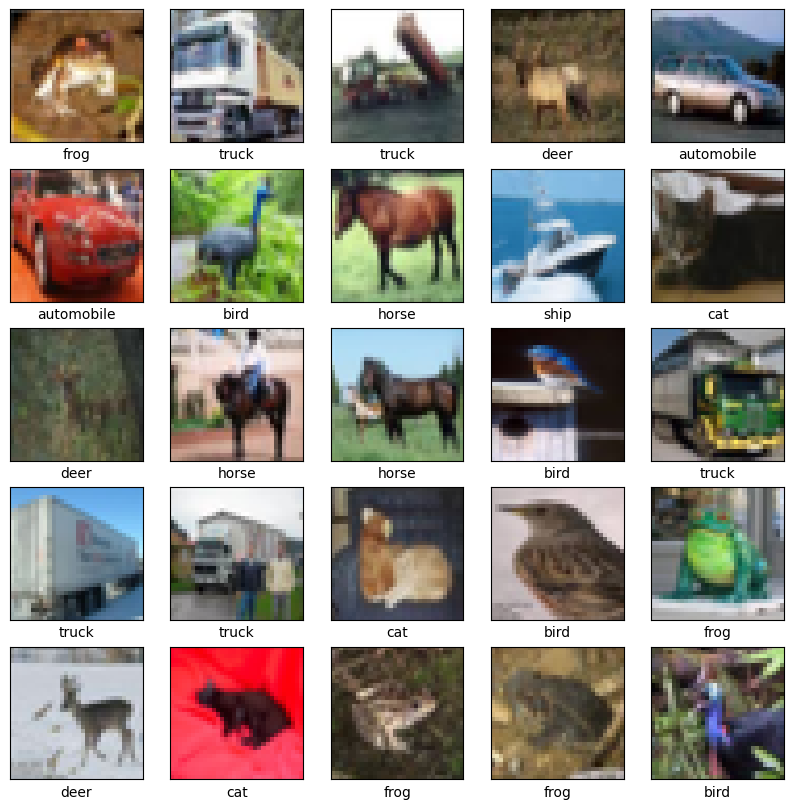

In [5]:
import matplotlib.pyplot as plt

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):  # Displaying the first 25 images
    plt.subplot(5, 5, i+1)  # 5x5 grid, position i+1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    # Replace train_labels[i] with labels[train_labels[i][0]] to display the class name
    plt.xlabel(labels[train_labels[i][0]])
plt.show()


## 2. Preprocess the data
Normalizing image data, this is done to change the pixel values from 0-255 to a range between 0-1, this makes computations easier

In [6]:
# normalize image data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

One hot encoding the labels, this is done for multi class classification problems such as CIFAR-10. this is used by many loss functions inlcluding categorical cross entropy suited for this data

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

Create training and validation datasets

In [8]:
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(batch_size)

## 3. Data augmentation


Data source train_ds is the cifar-10 training dataset in the form of a tf.data.Dataset

In [9]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>

Code used to retreive labels of train data

In [10]:
tmp = train_ds.take(1)
list(tmp)[0][1]


2024-03-18 20:19:48.563095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(32, 10), dtype=float64, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0.,

This defines the data augmentation steps

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)  # rotates by up to 36 degrees
])

Visualisation: after applying augmenation, the images are displayed to verify the augmentation effect.

Here the augmentation is applied to the first 9 images

2024-03-18 20:19:49.381237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


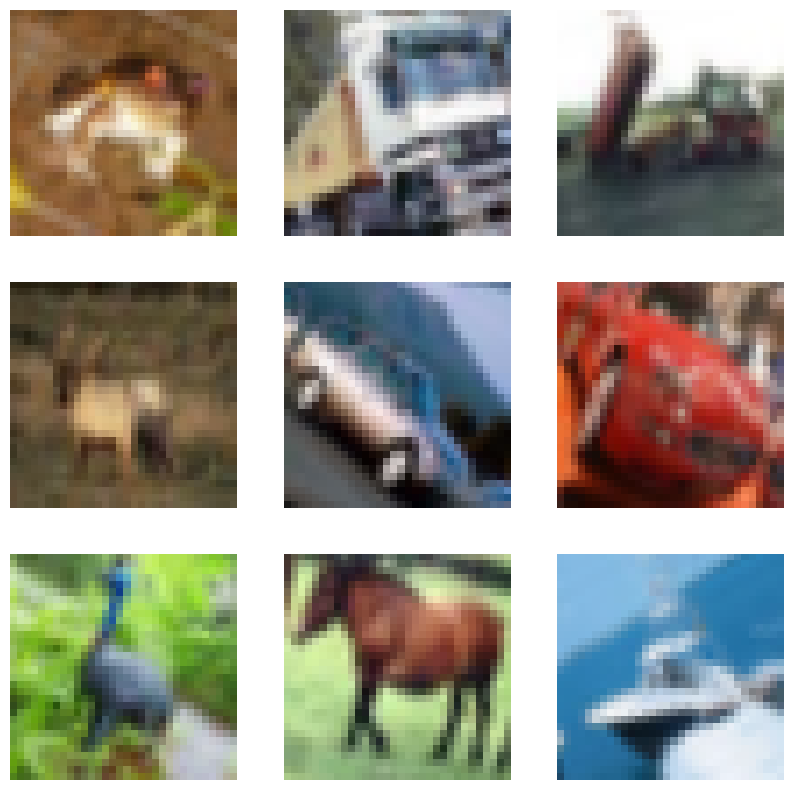

In [12]:
images, _ = list(train_ds.take(1))[0]

plt.figure(figsize=(10, 10))

# Displaying the first 9 augmented images
for i in range(9):
    augmented_image = data_augmentation(tf.expand_dims(images[i], 0))# augments the ith image 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy())  
    plt.axis("off")

plt.show()


Here augmentation is appied to the first image 9 times

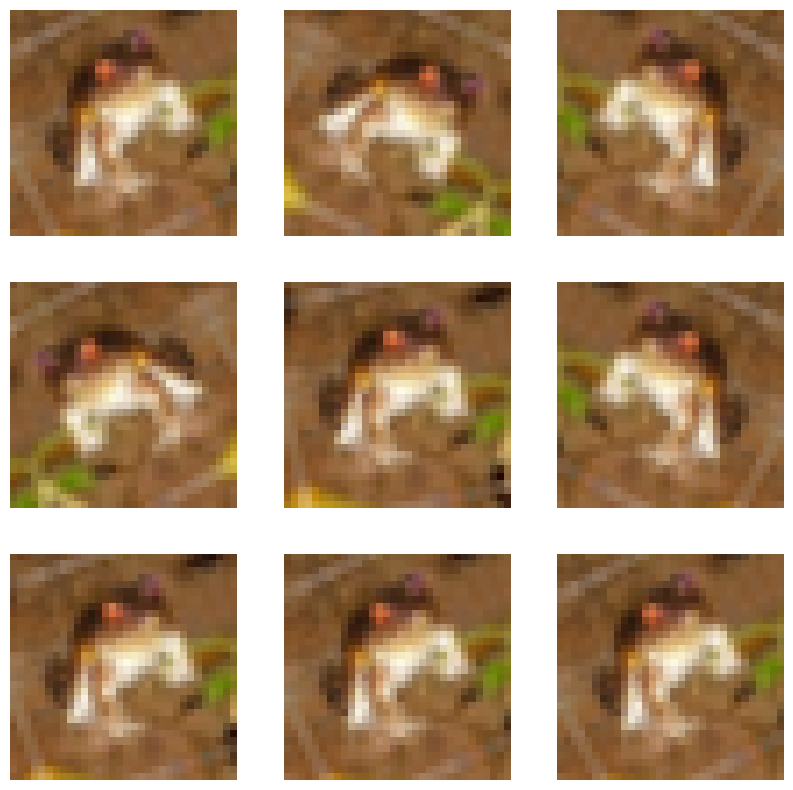

In [13]:
plt.figure(figsize=(10, 10))

# Apply data augmentation to the first image in the batch


# Displaying the first augmented image 9 times
for i in range(9):
    augmented_image = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    # Display the first augmented image
    plt.imshow(augmented_image[0].numpy())
    plt.axis("off")




Display the summary of the data augmentation model, showing the sequence of transormation that is applied to input images, contains **2 layers**.

**Random flip:** layer responsible for randomly flippiing images horizontaly 

**Random rotation:** layer responsible for randomly rotating them within a range of 0.1 / 36 degrees

**Output Shape:** for both layers is 1,32,32,3 where a single image is processed then  image size being 32x32 x 3 colour channels(RGB)

**Param**: there are 0 parameters since data augmentation doesnt involve learning

In [14]:
data_augmentation.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (1, 32, 32, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (1, 32, 32, 3)         │             0 │
│ (RandomRotation)                │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Gives the dimesnions of the images tensor 

In [15]:
images.shape

TensorShape([32, 32, 32, 3])

## 4. Building the model

Multiple Conv2D layers: These layers are used for feature extraction. Each Conv2D layer learns different features from the images with a varying number of filters and kernel sizes. The use of multiple such layers in sequence allows the model to learn a hierarchy of features, from simple edges in the early layers to complex shapes and objects in the deeper layers.

Activation layers ('relu'): The ReLU activation function introduces non-linearity, enabling the network to learn more complex patterns.

Dropout layers: These layers help prevent overfitting by randomly zeroing out a fraction of the outputs from the previous layer. This forces the network to not rely too much on any one node, thus learning more robust features.

Flatten layer: Converts the 2D feature maps to a 1D feature vector, necessary for the fully connected layers.

Dense layers: Fully connected layers that learn global patterns in the image.

BatchNormalization: Used to standardize the inputs to a layer, which stabilizes and speeds up the learning process.

Softmax activation in the output layer: Suitable for multi-class classification like CIFAR-10

Used the paper STRIVING FOR SIMPLICITY:
THE ALL CONVOLUTIONAL NET (Kingma & Ba, 2014) as inspiration for the model .



/Users/douglas/tfvenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


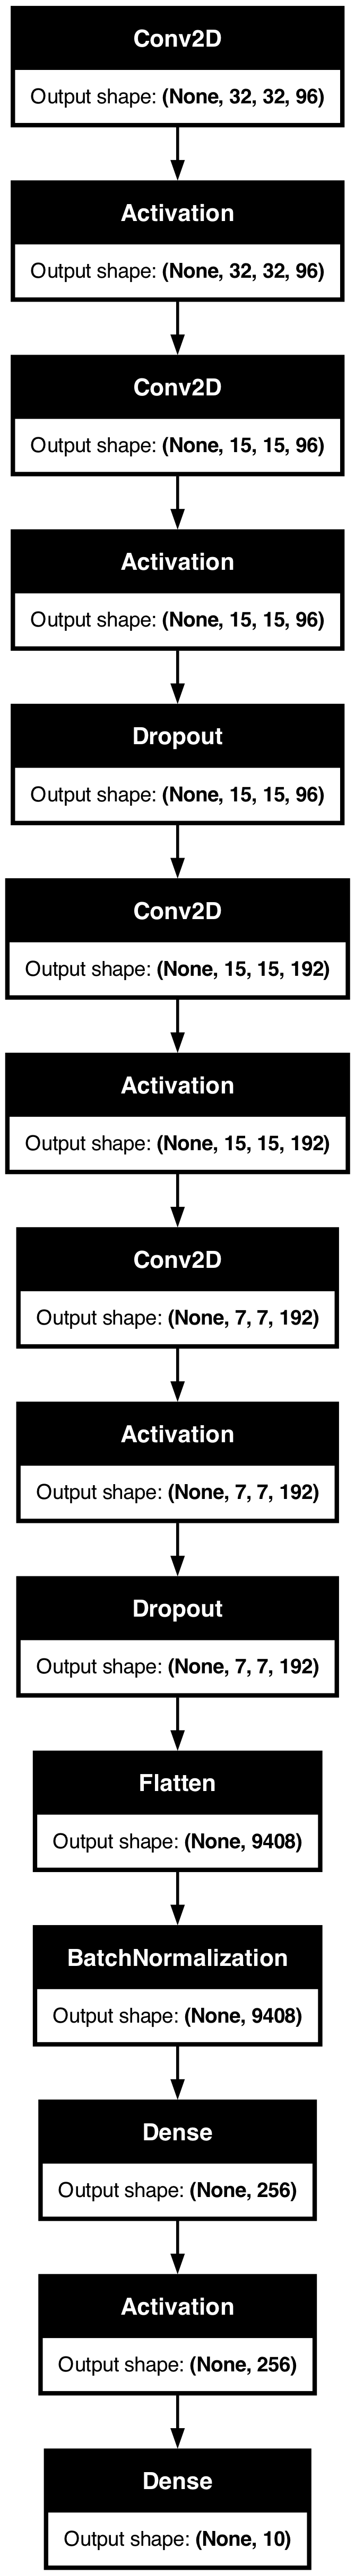

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dropout, Flatten, Dense, BatchNormalization

# CIFAR-10 has 10 classes
n_classes = 10

# Create a sequential model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(input_shape=train_data.shape[1:], filters=96, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

# Second Convolutional Block with Stride to reduce the image spatial size
model.add(Conv2D(filters=96, kernel_size=(3, 3), strides=2, padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.2))  # Regularization with Dropout

# Third Convolutional Block
model.add(Conv2D(filters=192, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

# Fourth Convolutional Block with Stride
model.add(Conv2D(filters=192, kernel_size=(3, 3), strides=2, padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout for more regularization

# Flattening the volume to feed to the Dense layers
model.add(Flatten())
model.add(BatchNormalization())  # Normalize and scale inputs or activations

# Fully Connected Layers
model.add(Dense(256))  # Dense layer with 256 units
model.add(Activation('relu'))
model.add(Dense(n_classes, activation="softmax"))  # Output layer with softmax for multi-class classification


# plot model
keras.utils.plot_model(model, show_shapes=True)



In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 9408)           │        37,632 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,408,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,032,682 (11.57 MB)

 Trainable params: 3,013,866 (11.50 MB)

 Non-trainable params: 18,816 (73.50 KB)

## 5. Compiling the model 

**Optimizer:** Adam optimizer was chosen as it is designed to handle sparse gradients on noisy data, which is common in image classification

**Loss function**: Categorical Cross entropy was used as it is most useful when there are 2 or more label classes

**Metric**: Accuracy was used because as its the most practical and useful metric to measure the performace of the training data

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 6. Training the model

In [19]:
n_epochs = 6  # The number of times the model will cycle through the data
batch_size = 256  # The size of the batches of data (number of images) that will be used


callbacks_list = None

# Start training the model with the CIFAR-10 dataset
H = model.fit(train_data, train_labels,  # training data and labels
              validation_data=(test_data, test_labels),  #testing data and labels
              epochs=n_epochs, 
              batch_size=batch_size, 
              callbacks=callbacks_list)

print('Done!!!')


Epoch 1/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.3708 - loss: 1.7282 - val_accuracy: 0.3456 - val_loss: 2.0671
Epoch 2/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.5765 - loss: 1.1820 - val_accuracy: 0.5830 - val_loss: 1.7781
Epoch 3/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.6617 - loss: 0.9463 - val_accuracy: 0.6725 - val_loss: 1.1062
Epoch 4/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.7143 - loss: 0.7964 - val_accuracy: 0.7249 - val_loss: 0.7949
Epoch 5/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.7502 - loss: 0.7007 - val_accuracy: 0.7246 - val_loss: 0.7997
Epoch 6/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7807 - loss: 0.6146 - val_accuracy: 0.7624 - val_loss: 0.6970
Done!!!


# 7. Evaluating the model
Once the model has been trained, the model is evaluated on the unseen test data. if the model performs well on the training data but poorly on the test data this can indicate overfitting. Accuracy, precision, recall etc. can be measured and indicate if further tuning is needed.

In [20]:
# use the first image from the test_data 
img_array1 = test_data[0]  
img_array = tf.expand_dims(img_array1, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
predicted_class = np.argmax(score)

# use the labels list to get the predicted class name
print(
    "This image is %.2f percent %s."
    % (100 * score[predicted_class], labels[predicted_class])
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
This image is 72.78 percent cat.


Plot of the image 

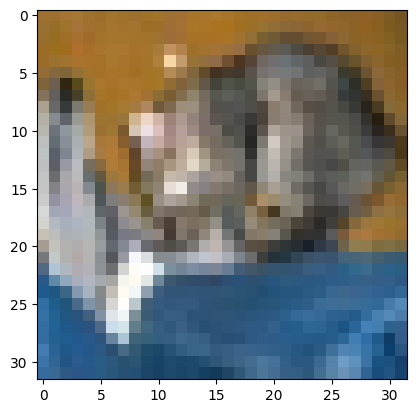

In [21]:
plt.imshow(img_array1)

Printout of all predictions of the image

In [22]:
# Get model predictions for the image
predictions = model.predict(img_array)
scores = predictions[0]

# Print out the scores for each class
for i, score in enumerate(scores):
    print(f"This image is {score * 100:.2f} percent {labels[i]}.")

# highlight the most likely class:
predicted_class = np.argmax(scores)
print(f"\nThe model is most confident about {labels[predicted_class]}, with a confidence of {scores[predicted_class] * 100:.2f} percent.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This image is 0.01 percent airplane.
This image is 0.05 percent automobile.
This image is 0.27 percent bird.
This image is 72.78 percent cat.
This image is 0.07 percent deer.
This image is 24.89 percent dog.
This image is 1.68 percent frog.
This image is 0.15 percent horse.
This image is 0.09 percent ship.
This image is 0.01 percent truck.

The model is most confident about cat, with a confidence of 72.78 percent.


Model accuracy

In [23]:
loss, accuracy = model.evaluate(val_ds)
print(f"Model accuracy on the test set is: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.7657 - loss: 0.6858
Model accuracy on the test set is: 76.24%


# 8.  Q1  (10 marks)
**My initial model 1 was very slow and inaccurrate, it took just under an hour however its accuracy wasnt good <50% :**
```python
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)  #  data augmentation here

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Adding a few convolutional blocks
    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Adding the final layer
    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    
    # Set the correct activation and number of units for CIFAR-10
    activation = "softmax"  # 'softmax' for multi-class classification
    units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

# Adjust `input_shape` for CIFAR-10 images and `num_classes` for 10 classes
model = make_model(input_shape=(32, 32, 3), num_classes=10)
  # Display the model architecture

# Optional: Plot the model 
keras.utils.plot_model(model, show_shapes=True)
```

**My model 2 was very fast <20mins  however its accuracy 68%-70% wasnt as good as my final model, doesnt have  pooling layers or Batch normalization**
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dropout, Flatten, Dense

# Number of output classes (CIFAR-10 has 10 classes)
n_classes = 10

# Create a sequential model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(input_shape=train_data.shape[1:], filters=32, use_bias=True, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))  # Dropout to prevent overfitting

# Second Convolutional Layer with Strides
model.add(Conv2D(filters=64, use_bias=False, kernel_size=(5,5), strides=2))
model.add(Activation('relu'))

# Additional Dropout
model.add(Dropout(0.2))

# Flattening the volume to feed into Dense Layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128))
model.add(Activation('relu'))

# Additional Dropout
model.add(Dropout(0.3))

# Output Layer with Softmax activation for multi-class classification
model.add(Dense(n_classes, activation="softmax"))


```
**Therefore I changed my entire model after considering what worked and what didnt, comparing model 2 to my final model there was  a tradeoff of increasing computing time but also increasing accuracy**

### What increases computing time?

**Data augmentation & Data size:** : training on large datasets  increases the amount of data that needs to be processed, in the same vein, on the fly data augmentation within the model can increase training/computing time since it generates augmented data during training, this adds significant computational time for each epoch. That is why it was removed in the final model which was a tradeoff to use computation for other parts of the model.

**Data dimensions**: higher resolution images/larger input sizes mean more pixels/features for the model to process, increasing computing time

**Complex model architecture**: More layers and filter in the model mean more trainable parameters, which increases the amount of computation required. This can significantly slow down training time. 

**Batch size:** large bbatch size requires more memory and computational time.

**Batch normalization**: while beneficial for model traing, bach normalization adds computational complexity, this computes  means and variance for input which slows down training.

**High Dropout rate**: a high dropout of 0.5, can slow down model convergance, which can lead to discarding useful feature makeing the learning process less efficient.

**absence of pooling layers**: pooling layers reduce height and width of inputs for the next convultion layer. not including these means the model has to process more data through more layers. 

**Training duration/ Epochs:** more trainiing epochs mean the model iterates over the data more times increasing training time.

### What increases accuracy?

**Data augmentation(regularisation):** applying data augmentation can increase the model accuracy by artificially enlargeneing the training datase, this helps the model generalise better to unseen data.

**model architecture**: More complex architecture allows the model to learn and represent more more complex patterns and relationships in the data which can improve accuracy, however there is a tradeoff between complexity and overfitting risk.

**Batch normalization**: stabilises the learning process by normalizing inputs or activiations of each layer, which can lead to better model accuracy as it prevents  model from being configured poorly

**optimized Dropout rate(regularisation)**: dropout rates configured correctly can help prevent overfitting by randomly disabling neurons during training, the is helps the model generalise well to new data which can increase accuracy

**pooling layers**:pooler layer can reduce dimensionality of feature maps This aids in taking the most important features from the inputs, contributing to improved accuracy.

**Data Quality & Quantity**: more high quality, diverse and relevant training data can imporive the models ability to generalize, thus increasing accuracy.

**Optimisation Algortithms**: advanced optimizers like adam, RMSprop or SGD find the best parameters (weights) for the model that minimizes the loss function thus increasing accuracy.

**Hyerparameter tuning**: carefuuly tuning hyperparameters including learning rate, batch size etc. can significantly impact model performance and accuracy.

### Tradeoffs

When transitioning from model 2 to the final model, the primary trade-off was between training speed and model accuracy. By adding pooling layers and batch normalization, and optimizing dropout rates, there was an increase in the model's ability to learn from the CIFAR-10 dataset more effectively, thereby improving accuracy with increased computing time.

### References
D. P. Kingma and J. Ba, "Adam: A Method for Stochastic Optimization," arXiv:1412.6806, 2014. [Online]. Available: https://arxiv.org/pdf/1412.6806.pdf